(0.0, 90.0)

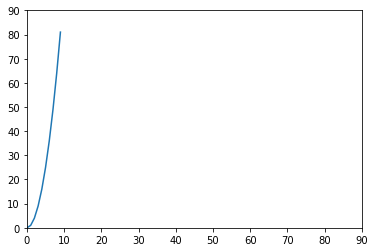

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(10)
plt.plot(x**2)
plt.xlim(0,90) # scale이 안 맞기에 xlim, ylim을 줌.
plt.ylim(0,90) 

|문자|색상|
|--|--|
|b|Blue|
|g|Green|
|r|Red|
|c|Cyan|
|m|Magenta|
|y|yellow|
|k|Black|
|w|White|

|마커|모양|
|--|--|
|o|Circle|
|IV|Triangle Down|
|^|Triangle Up|
|s|Square|
|+|Plus|
|-|실선|
|--|점선|
|.|Point|

(0.0, 100.0)

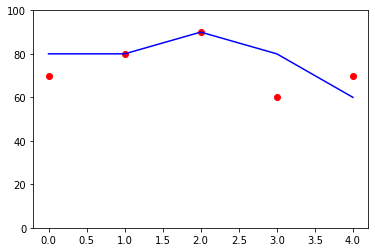

In [2]:
score = [70, 80, 90, 60, 70]
plt.plot(range(5), score, 'ro')  # r은 red(색상) , o는 Circle(모양)

score2 = [80, 80, 90, 80, 60]
plt.plot(range(5), score2, 'b-')

plt.ylim(0, 100)


- 여러 그래프를 겹처 그리기
1. plt.plot(x, y, style, x2, y2, style2 , ...) 
2. plt.plot() 여러번 호출

(0.0, 100.0)

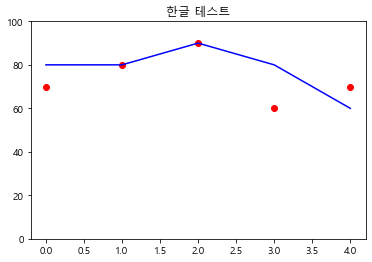

In [3]:
# 한글 세팅 방법
plt.rcParams['font.family'] = "Malgun Gothic"  # 맑은 고딕
# 한글이 잘 안먹으면 kernel restart

score = [70, 80, 90, 60, 70]
plt.plot(range(5), score, 'ro')  # r은 red(색상) , o는 Circle(모양)

score2 = [80, 80, 90, 80, 60]
plt.plot(range(5), score2, 'b-')
plt.title("한글 테스트")

plt.ylim(0, 100)

- x축 : xticks , y축 : yticks

In [4]:
import pandas as pd

apt_price = pd.read_csv(
    "./아파트(매매)__실거래가_20220401113837.csv",
    skiprows= 15,
    encoding="euc-kr",
    thousands=",")

In [5]:
apt_price["평"] = apt_price["전용면적(㎡)"] / 3.03
apt_price.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,평
0,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,202104,15,174000,9,1988,언주로 103,NaN,-,-,25.660066
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202105,15,195000,5,1987,언주로 3,NaN,-,-,26.392739
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202108,11,200000,3,1987,언주로 3,NaN,-,-,26.392739
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987,언주로 3,NaN,-,-,26.392739
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987,언주로 3,NaN,중개거래,서울 강남구,26.392739


In [6]:
apt_price["평형"] = pd.cut(
    apt_price["평"],
    bins=[0,10,20,30,40,50,60,1000], # 구간경계값
    labels=['10평이하', '10평대', '20평대', '30평대', '40평대', '50평대','50평이상']
)
apt_price.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,평,평형
0,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,202104,15,174000,9,1988,언주로 103,NaN,-,-,25.660066,20평대
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202105,15,195000,5,1987,언주로 3,NaN,-,-,26.392739,20평대
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202108,11,200000,3,1987,언주로 3,NaN,-,-,26.392739,20평대
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987,언주로 3,NaN,-,-,26.392739,20평대
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987,언주로 3,NaN,중개거래,서울 강남구,26.392739,20평대


In [7]:
import numpy as np
apt_price["계약년"] = apt_price["계약년월"] // 100
apt_price["계약월"] = apt_price["계약년월"] % 100
apt_price["계약일"] = np.where(apt_price["계약일"] < 10 ,
        "0" + apt_price["계약일"].astype(str), apt_price["계약일"].astype(str) )
apt_price["계약년월일"] = apt_price["계약년월"].astype(str) + apt_price["계약일"].astype(str) 
apt_price["계약년월일"] = pd.to_datetime(apt_price["계약년월일"])

In [8]:
# 시군구를 분할 ~~시 ~~구 ~~동
apt_price["구"] = apt_price["시군구"].str.split().str[1]
apt_price["동"] = apt_price["시군구"].str.split().str[2]



(20.0, 30.0)

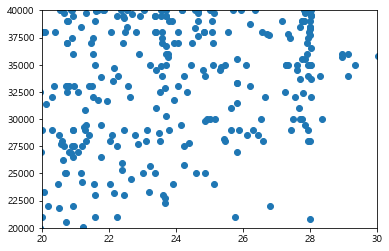

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

apt_price[["평","거래금액(만원)"]]
plt.plot(apt_price["평"],apt_price["거래금액(만원)"],'o') # plt에 style만 표시
plt.ylim(20000, 40000)
plt.xlim(20,30)  # 상세히 보고 싶은 구간을 정하면 된다.

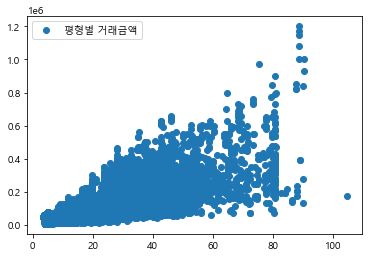

In [10]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

apt_price[["평","거래금액(만원)"]]
plt.plot(apt_price["평"],apt_price["거래금액(만원)"],'o', label='평형별 거래금액') # plt에 style만 표시
plt.legend()  # legend()는 기본이 best이고 best는 알아서 겹쳐지지 않게 그려줌

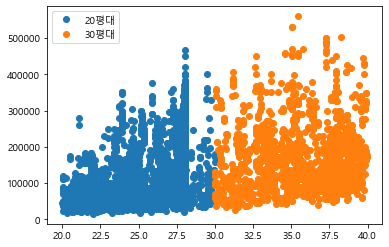

In [11]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

apt_price[["평","거래금액(만원)"]]

# 20평대 행 추출
b20 = apt_price["평형"] == "20평대"     # 20평대 행만 가져오기
b30 = apt_price["평형"] == "30평대"     # 30평대 행만 가져오기


plt.plot(apt_price.loc[b20, :]["평"],apt_price.loc[b20, :]["거래금액(만원)"],'o', label='20평대') # plt에 style만 표시

# 30평대 행 추출

plt.plot(apt_price.loc[b30, :]["평"],apt_price.loc[b30, :]["거래금액(만원)"],'o', label='30평대') # plt에 style만 표시
plt.legend()

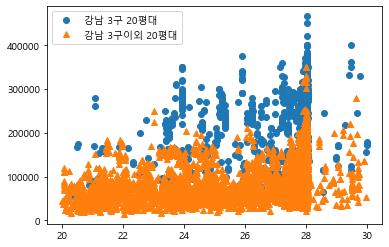

In [12]:
# 강남 3구의 20평대의 평과 거래금액을 산포도로 그리기
import matplotlib.pyplot as plt

b_gn3 = apt_price["구"].isin(["강남구","서초구","송파구"])
b_gn22 = ~apt_price["구"].isin(["강남구","서초구","송파구"])

b20 = apt_price["평형"] == "20평대"

gn3 = apt_price.loc[b_gn3 & b20, :]
gn22 = apt_price.loc[b_gn22 & b20, :]

plt.rcParams['font.family'] = 'Malgun Gothic'

plt.plot(gn3["평"], gn3["거래금액(만원)"],'o', label='강남 3구 20평대') # plt에 style만 표시
plt.plot(gn22["평"], gn22["거래금액(만원)"],'^', label='강남 3구이외 20평대') # plt에 style만 표시
plt.legend()

In [13]:
# 강남 3구와 그 외지역의 "거래금액(만원)"의 describe() 함수 결과를 가로로 합친 데이터프레임을 출력해보세요.

gn3_22 = pd.concat([gn3[["거래금액(만원)"]].describe(), gn22[["거래금액(만원)"]].describe()],axis=1)
gn3_22

,거래금액(만원),거래금액(만원)
count,1726.000000,10314.000000
mean,201327.782155,98085.720962
std,71799.568944,37576.892853
min,41510.000000,15000.000000
25%,150000.000000,71000.000000
50%,202400.000000,90000.000000
75%,250000.000000,121762.500000
max,466000.000000,350000.000000


([<matplotlib.axis.XTick at 0x210ef000130>,
 [Text(0, 0, '강남3구 거래평균'), Text(1, 0, '그외지역 거래평균')])

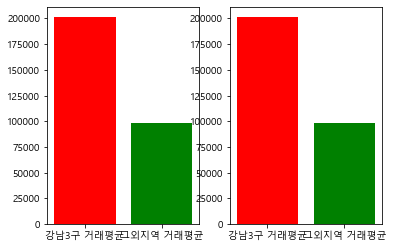

In [14]:
plt.subplot(1,2,1)
plt.bar(["강남3구 거래평균","그외지역 거래평균"], gn3_22.loc["mean",:], color=['r','g'])

plt.subplot(1,2,2)

plt.bar([0,1], gn3_22.loc["mean",:], color=['r','g'])

plt.xticks(
    [0,1],
    ["강남3구 거래평균","그외지역 거래평균"])

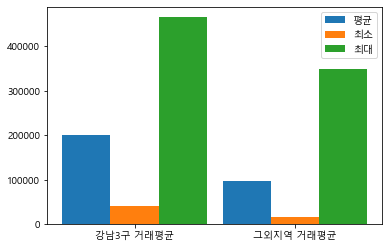

In [15]:
plt.bar( [0,1], gn3_22.loc["mean",:], width=0.3, label="평균")

plt.bar( [0.3,1.3], gn3_22.loc["min",:], width=0.3,
        label="최소")

plt.bar(
        [0.6, 1.6],
       gn3_22.loc["max",:],
        width=0.3,
        label="최대")
plt.xticks(
    [0.3,1.3],
    ["강남3구 거래평균","그외지역 거래평균"])

plt.legend()


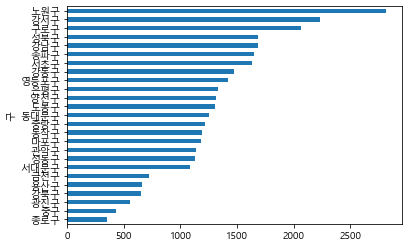

In [16]:
# 구별 거래건수
g_c = apt_price.groupby("구")["단지명"].count().sort_values().plot.barh()

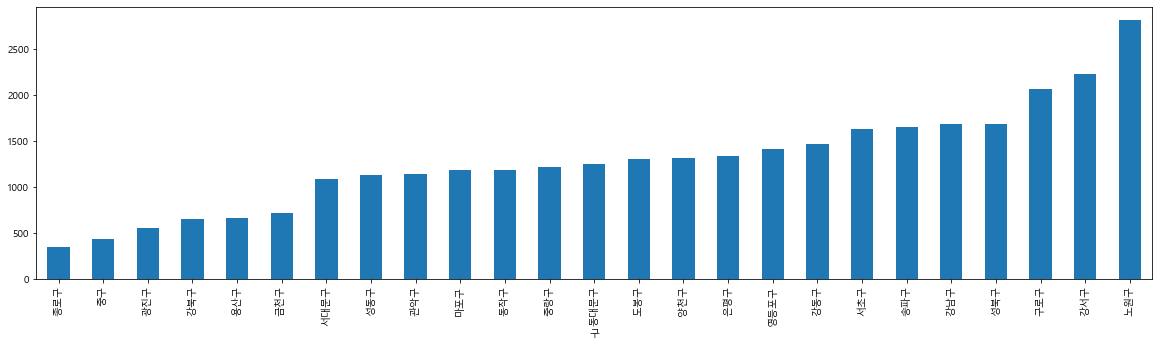

In [17]:
# Figure Size ( 단위: inch )

# 구별 거래건수
plt.figure(figsize=(20,5))
g_c = apt_price.groupby("구")["단지명"].count().sort_values().plot.bar()

(array([ 150., 1528., 1099., 1425., 1748., 2648., 3103., 2894., 3089.,
        2211., 9458., 2638.,  148.]),
 array([      0,   10000,   20000,   30000,   40000,   50000,   60000,
          70000,   80000,   90000,  100000,  200000,  500000, 2000000]),
 <BarContainer object of 13 artists>)

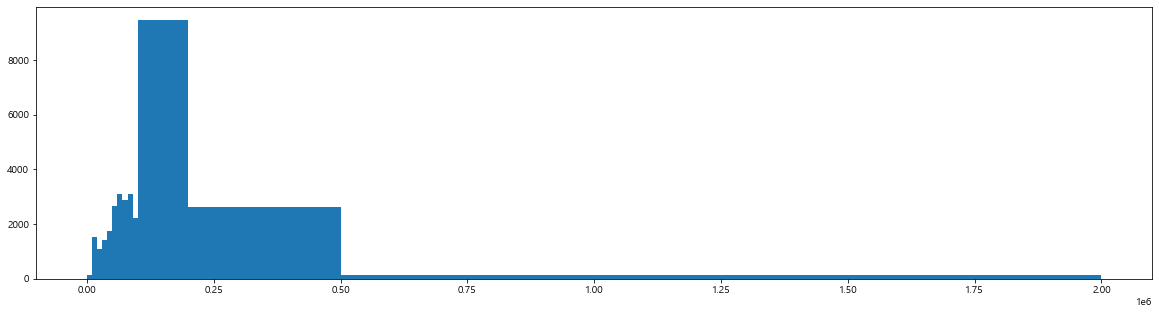

In [18]:
plt.figure(figsize=(20,5))
plt.hist(apt_price["거래금액(만원)"],
        bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 500000, 2000000 ])

- Series로 그릴때에는 x축이 index 값이고, DataFrame은 datetime type으로 가능하다.

<AxesSubplot:xlabel='계약월'>

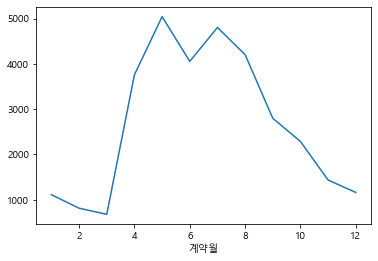

In [19]:
# 월별 거래건수
apt_price.groupby("계약월")["단지명"].count().plot()

- unstack() : 누적된 작은 index를 stack에서 빼서 column으로 옮기는 함수

<AxesSubplot:xlabel='계약월'>

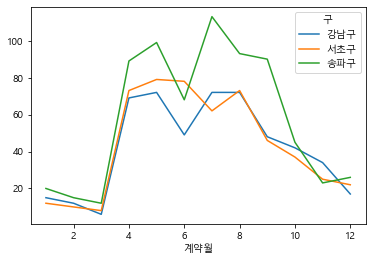

In [20]:
# 월별, 구별 계약 건수
# print(gn3.groupby(["계약월","구"])["단지명"].count())

gn3.groupby(["계약월","구"])["단지명"].count().unstack().plot()
# unstack() : 누적된 작은 index를 stack에서 빼서 column으로 옮기는 함수


- 컬럼당 한 줄씩 그린다.

<AxesSubplot:xlabel='계약월'>

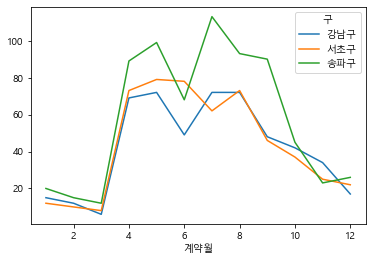

In [21]:
gn3.pivot_table(index="계약월", columns="구", values="거래금액(만원)", aggfunc="count").plot()   # groupby 말고 pivot으로 그리기

<AxesSubplot:xlabel='계약월'>

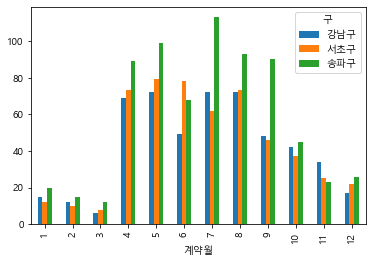

In [22]:
gn3.pivot_table(index="계약월", columns="구", values="거래금액(만원)", aggfunc="count").plot.bar()

<AxesSubplot:xlabel='구'>

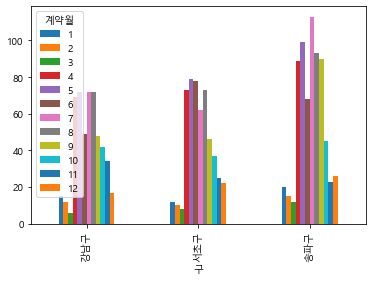

In [23]:
gn3.pivot_table(index="계약월", columns="구", values="거래금액(만원)", aggfunc="count").T.plot.bar()  

- bar 이 외에도 pie, hist, kde(밀도 차트), box(박스 차트) 등이 있다.

- outliar: 이상치, inliar

{'whiskers': [<matplotlib.lines.Line2D at 0x210ef641eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x210ef64c610>,
 'boxes': [<matplotlib.lines.Line2D at 0x210ef641b20>],
 'medians': [<matplotlib.lines.Line2D at 0x210ef64cd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x210ef654100>],
 'means': []}

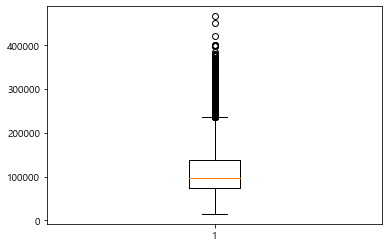

In [24]:
cond = apt_price["평형"] == "20평대"
plt.boxplot(apt_price.loc[cond ,"거래금액(만원)"])  
# 이상치가 box 값보다 상단에 많이 분포한 것은 집값이 오를 것을 예상하고 사는 사람들이 많다.

<AxesSubplot:>

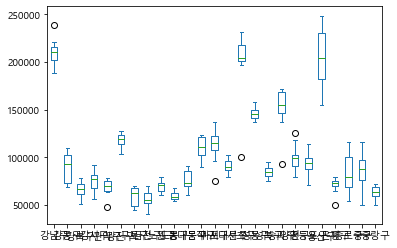

In [25]:
apt_price.pivot_table(index="계약월", columns="구", values="거래금액(만원)", aggfunc="mean").plot.box()

In [26]:
import seaborn as sns
tips= sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

<AxesSubplot:xlabel='total_bill'>

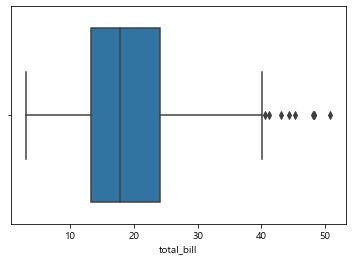

In [27]:
display(tips["total_bill"].describe())
sns.boxplot(x=tips["total_bill"])

<AxesSubplot:xlabel='day', ylabel='total_bill'>

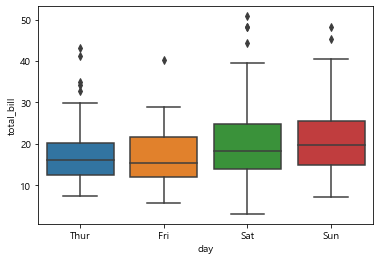

In [28]:
sns.boxplot(data=tips,x="day",y="total_bill")

<AxesSubplot:xlabel='구', ylabel='거래금액(만원)'>

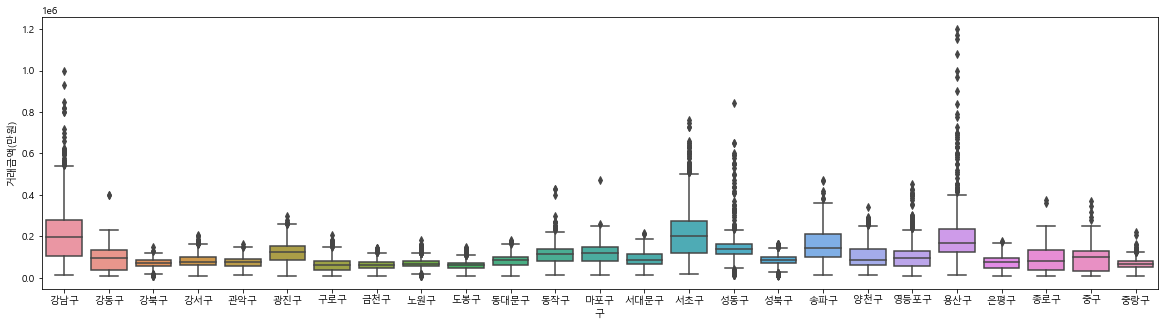

In [29]:
# 구별 거래금액 분포
plt.figure(figsize=(20,5))
sns.boxplot(data=apt_price, x="구", y="거래금액(만원)")  

- 큰 평수가 데이터에 영향을 미치기에 10평형에 대해서만도 알아보겠다.

<AxesSubplot:xlabel='구', ylabel='거래금액(만원)'>

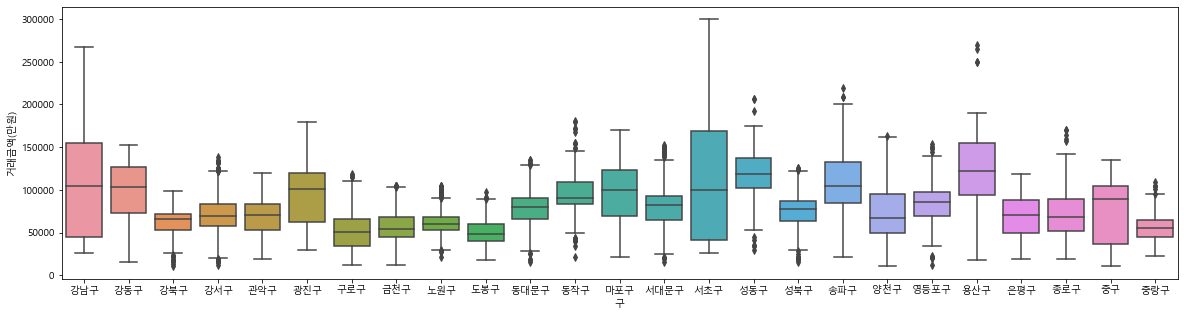

In [30]:
# 10평형 아파트 거래금액의 구별 분포를 그리세요
plt.figure(figsize=(20,5))
cond = apt_price["평형"] == "10평대"
sns.boxplot(data=apt_price.loc[cond,:], x="구", y="거래금액(만원)")  


- 수요가 많은 10~19평의 값을 보더라도 용산구의 이상치가 두드러진다. 

<AxesSubplot:xlabel='day', ylabel='tip'>

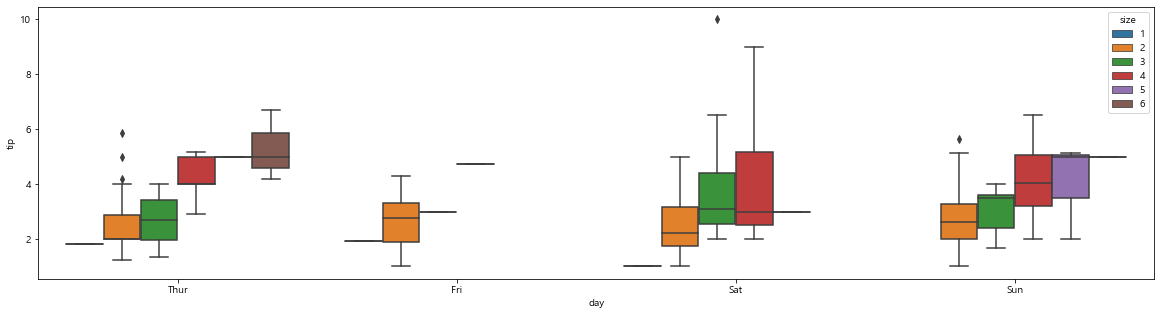

In [31]:
plt.figure(figsize=(20,5))
sns.boxplot(data=tips, x="day", y="tip", hue="size")

- 손님 수가 많을 수록 tip의 값이 높다.

<AxesSubplot:xlabel='구', ylabel='계약월'>

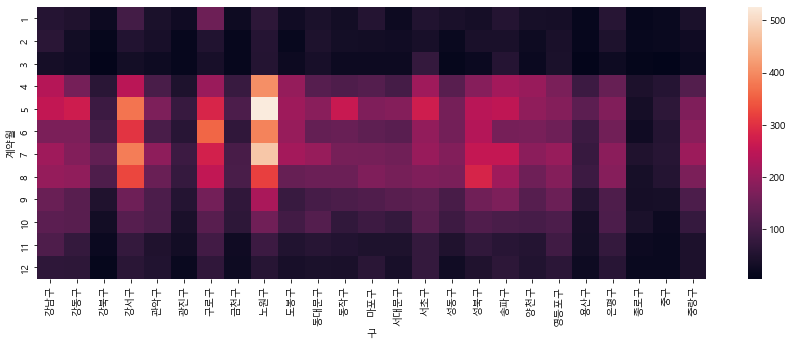

In [32]:
# 월별, 구별 거래건수
월별구별거래건수 = apt_price.pivot_table(index="계약월", columns="구", values="단지명", aggfunc="count")
plt.figure(figsize=(15,5))
sns.heatmap(월별구별거래건수)

- (밝을 수록 거래가 많음) 겨울에는 거래가 거의 없고 노원구의 거래가 많다. 

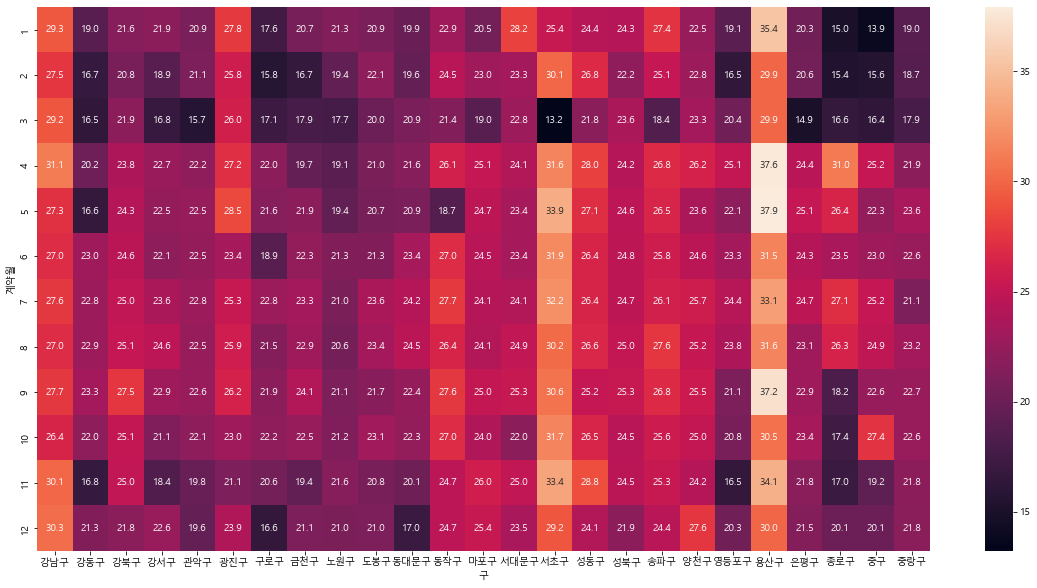

In [33]:
월별구별평수 = apt_price.pivot_table(index="계약월", columns="구", values="평", aggfunc="mean")
plt.figure(figsize=(20,10))
sns.heatmap(월별구별평수, annot=True, fmt=".1f")
plt.show()

In [34]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [35]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

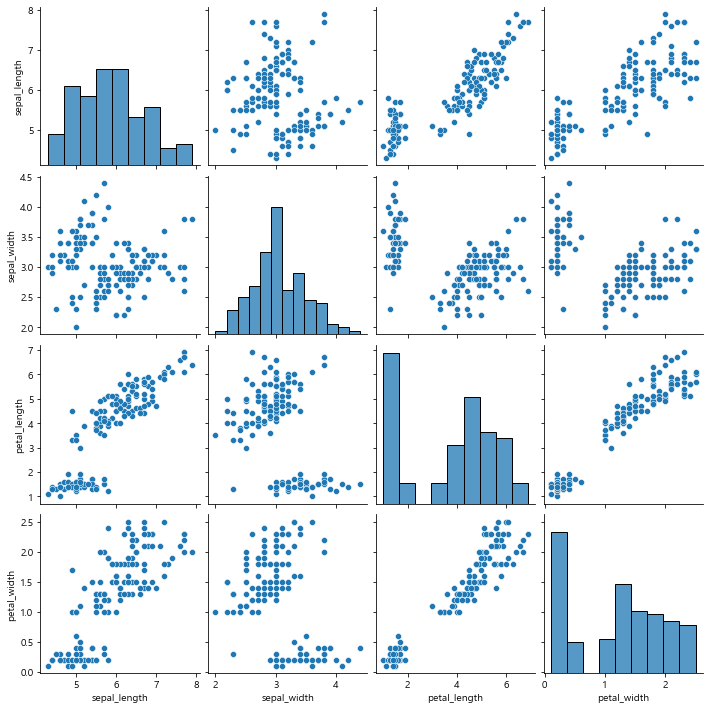

In [36]:
sns.pairplot(iris)

In [37]:
apt2 = apt_price[["거래금액(만원)","평","계약월"]]
apt2

,거래금액(만원),평,계약월
0,174000,25.660066,4
1,195000,26.392739,5
2,200000,26.392739,8
3,220000,26.392739,9
4,215000,26.392739,12
...,...,...,...
32134,83200,19.722772,10
32135,50000,27.950495,11
32136,49500,23.834983,5
32137,30000,19.293729,7


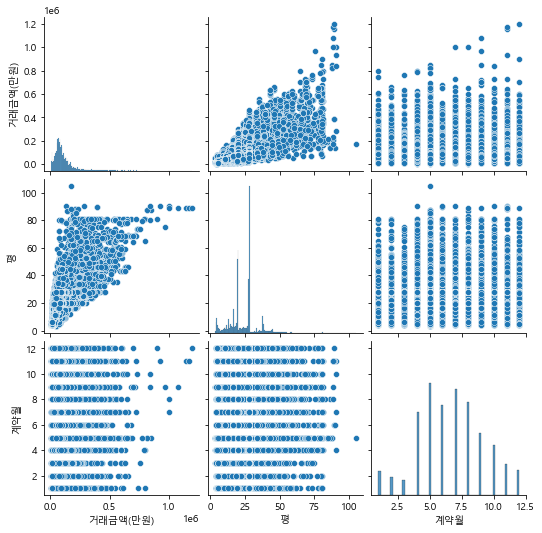

In [38]:
sns.pairplot(apt2)

- (1,1) : 같은 평이여도 가격차이가 벌어진다.(입지에 따라서 가격차이가 많이 난다.)
- (2,2) : 한겨울에는 거래가 거의 없고 봄부터 거래가 활발해진다.

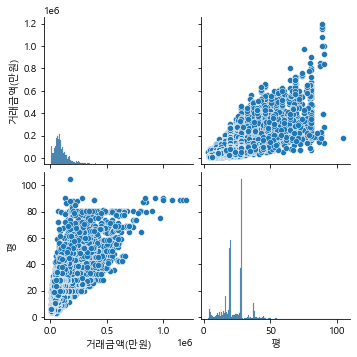

In [39]:
apt3 = apt_price[["거래금액(만원)","평"]]
sns.pairplot(apt3)

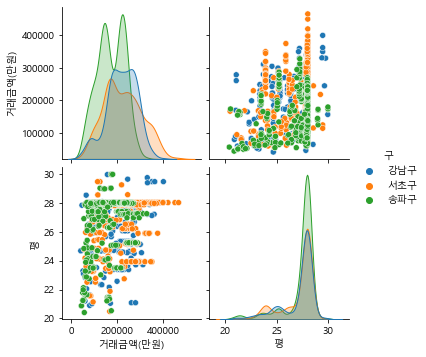

In [40]:
# 강남 3구
apt3 = gn3[["거래금액(만원)","평", "구"]]  
sns.pairplot(apt3, hue="구")    

- "구"는 문자형이여서 값이 나타나지는 않지만 hue로 넣게 되면 구 별로 색을 달리해서 보여준다.